In [1]:
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%config InlineBackend.figure_format='retina'

In [131]:
def dipole(xc, yc, m, dec, inc, x, y, h):

    # z:   height

    # m,de,inc -> mx,my,mz
    dec = np.deg2rad(dec);
    inc = np.deg2rad(inc);

    mx = m * np.cos(dec) * np.cos(inc);
    my = m * np.sin(dec) * np.cos(inc);
    mz = m * np.sin(inc);
    mvec = [mx, my, mz];

    [X, Y, Z] = np.meshgrid(xc-x, yc-y, h);
    # [theta,rho] = cart2pol(X,Y);

    B = field(mvec, X, Y, Z);
    return B


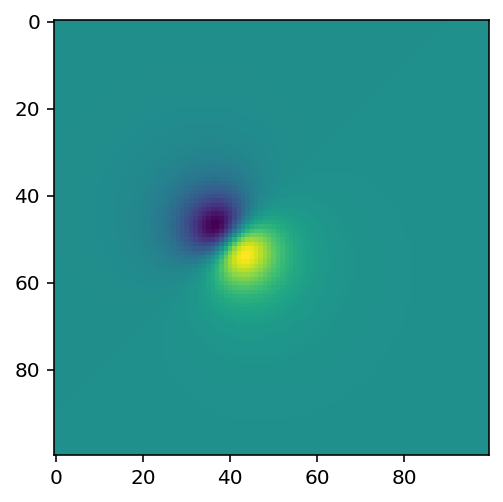

In [206]:
def field(m, x, y, z):
    r = np.sqrt(x**2+y**2+z**2);
    R = np.concatenate([x,y,z], axis = 2);
    
    M = ones(R.shape);
    M[:,:,0] = m[0];
    M[:,:,1] = m[1];
    M[:,:,2] = m[2];

    mu0 = 4*np.pi*1e-7; #μ0 = 4π×10−7 H/m
    a = (mu0 / (4 * np.pi));
    d = dot_along_third_axis(M,R)
    d = np.stack([d,d,d]).T
    B = a * (3 * d * R - np.square(r) * M) / np.power(r,5);
    return B
#     % Bx = a * (3 * (m(1) * x) .* x - r.^2 * m(1))./r.^5;
#     % By = a * (3 * (m(2) * y) .* y - r.^2 * m(2))./r.^5;
#     % Bz = a * (3 * (m(3) * z) .* z - r.^2 * m(3))./r.^5;
# dipole(arange(1,11), arange(1,11), 1000, 45, 45, 40,50,10)
imshow(dipole(arange(100), arange(100), 1000, 45, 0, 40,50,10)[:,:,2])
# colorbar()

In [ ]:
a = array([[1,2],[3,4]])

In [197]:
stack([a,a,a]).T.shape

(2, 2, 3)

In [168]:
def dot_along_third_axis(A,B):
    out = np.zeros(A.shape[:2])
    for i in arange(A.shape[0]):
        for j in arange(A.shape[1]):
            out[i,j] = dot(A[i,j,:], B[i,j,:])
    return out

In [169]:
A = array([[[1,1],[1, 1]],
           [[2,3],[4,5]],
           [[6,7],[8,9]]])
A = np.swapaxes(A,0,2)
B = array([[[2,2],[2, 2]],[[10,11],[12,13]],[[14,15],[16,17]]])
B = np.swapaxes(B,0,2)

print(A[0,0,:], B[0,0,:])

dot_along_third_axis(A,B)

[1 2 6] [ 2 10 14]


array([[106., 178.],
       [140., 220.]])

In [ ]:
function B = dipole(xc, yc, m, dec, inc, x, y, h)

% rho: radial distance
% phi: polar angle
% z:   height

%% m,de,inc -> mx,my,mz
dec = deg2rad(dec);
inc = deg2rad(inc);

mx = m * cos(dec) * cos(inc);
my = m * sin(dec) * cos(inc);
mz = m * sin(inc);
mvec = [mx, my, mz];

%%
[X, Y, Z] = meshgrid(xc-x, yc-y, h);
% [theta,rho] = cart2pol(X,Y);

B = field(mvec, X, Y, Z);
end

function B = field(m, x, y, z)
r = sqrt(x.^2+y.^2+z.^2);
R = cat(3, x,y,z);
M = ones(size(R));
M(:,:,1) = m(1);
M(:,:,2) = m(2);
M(:,:,3) = m(3);

mu0 = 4*pi*1e-7; %μ0 = 4π×10−7 H/m
a = (mu0 / (4 * pi));
B = a * (3 * dot(M,R,3).*R - r.^2 .* M)./r.^5;
% Bx = (mu0 / (4 * pi)) * (3 * (m(1) * x) .* x - r.^2 * m(1))./r.^5;
% By = (mu0 / (4 * pi)) * (3 * (m(2) * y) .* y - r.^2 * m(2))./r.^5;
% Bz = (mu0 / (4 * pi)) * (3 * (m(3) * z) .* z - r.^2 * m(3))./r.^5;
end
